# Flight Price

# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [50]:
import pandas as pd

df = pd.read_excel(r"C:\Users\milan\Documents\Data Science\skills\Notes\Pandas_\New Assq\flight_price.xlsx")
# Find out the number of rows and columns
num_rows, num_cols = df.shape

# Print the results
print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")

The DataFrame has 10683 rows and 11 columns.


# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

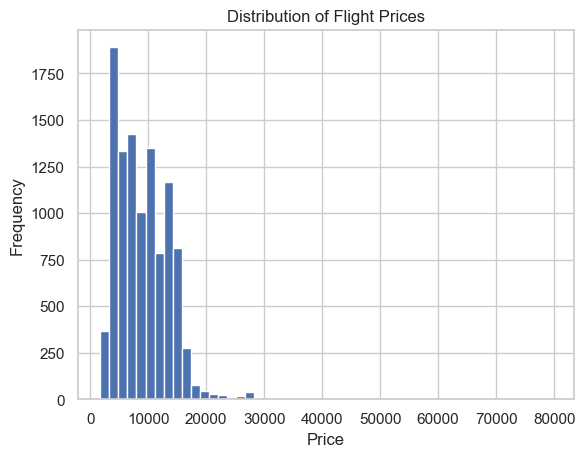

In [51]:
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of flight prices
plt.hist(df['Price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.show()


In [52]:
df['Price'].skew()

1.8125523782189141

>Based on the skewness value you provided, which is 1.8125523782189141, the distribution of flight prices in the dataset is positively skewed or right-skewed. This means that the majority of flight prices in the dataset are clustered towards the lower end of the range, with a few high-priced outliers pulling the mean towards the right.

>A histogram can also provide a visual representation of the distribution, as discussed in my previous answer. The positive skewness indicates that the mean price is likely to be higher than the median price, and that there may be some high-priced flights that are driving up the mean. It may be helpful to also examine the distribution of prices across different airlines or routes, to gain further insights into the factors that influence flight prices.

# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [53]:
# Calculate the range, minimum, and maximum prices
price_range = range(df['Price'].min(), df['Price'].max() + 1)
min_price = df['Price'].min()
max_price = df['Price'].max()

print(f"Range of Prices: {price_range}")
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")

Range of Prices: range(1759, 79513)
Minimum Price: 1759
Maximum Price: 79512


# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

In [54]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

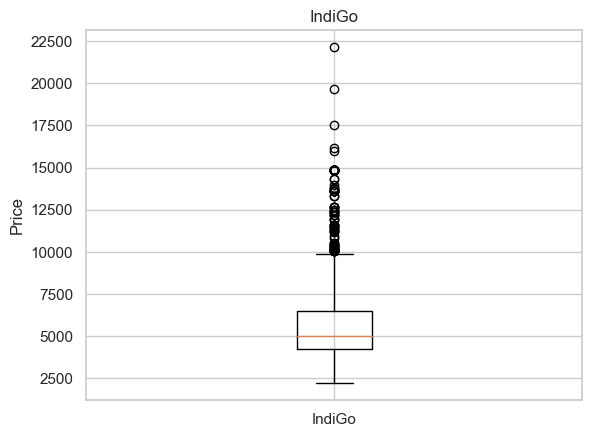

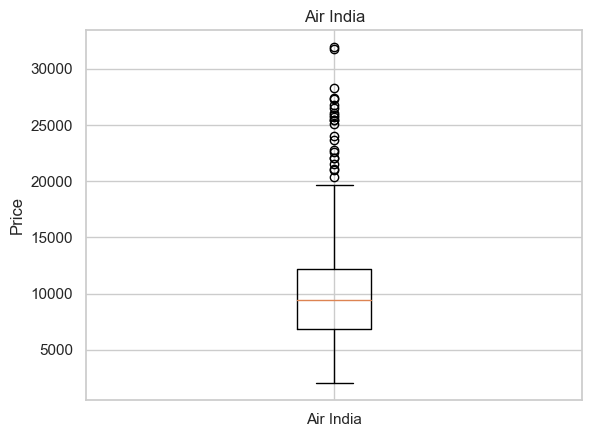

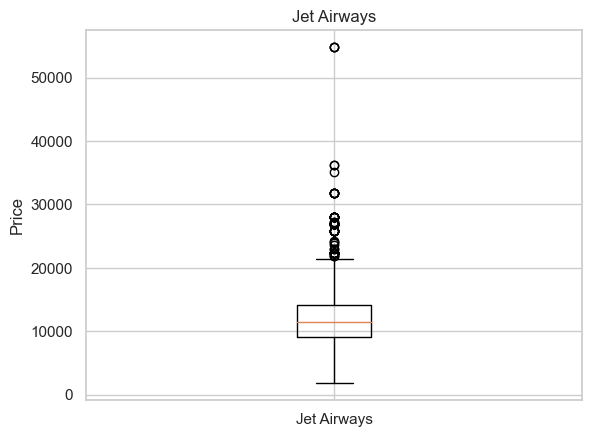

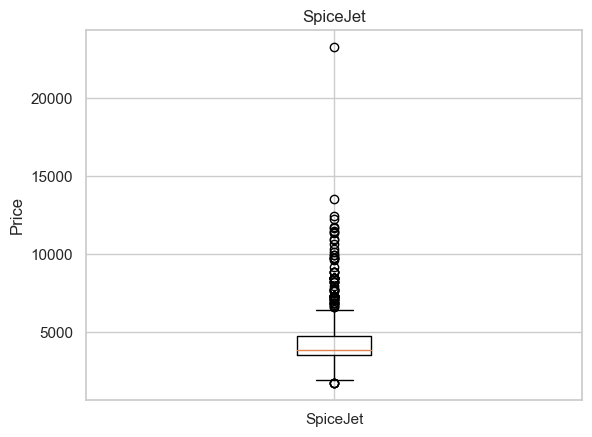

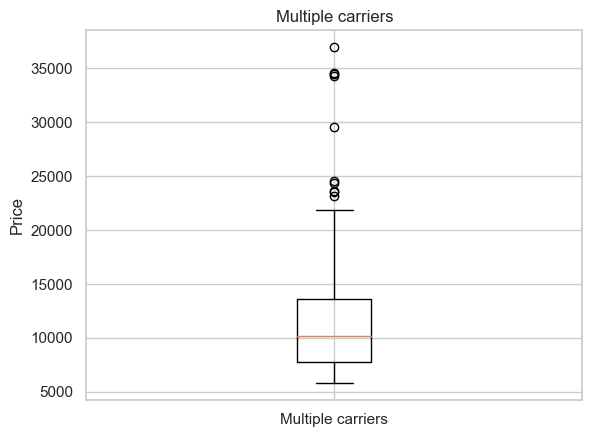

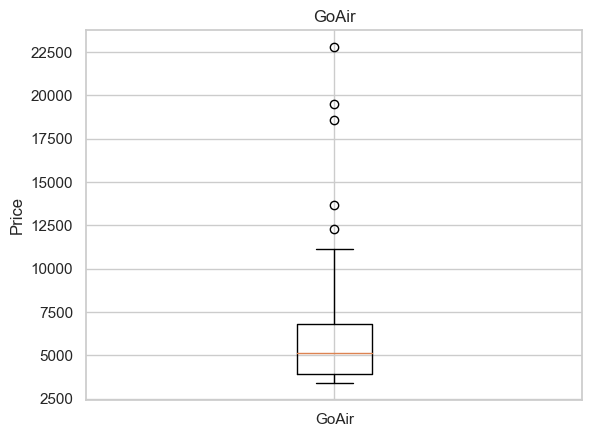

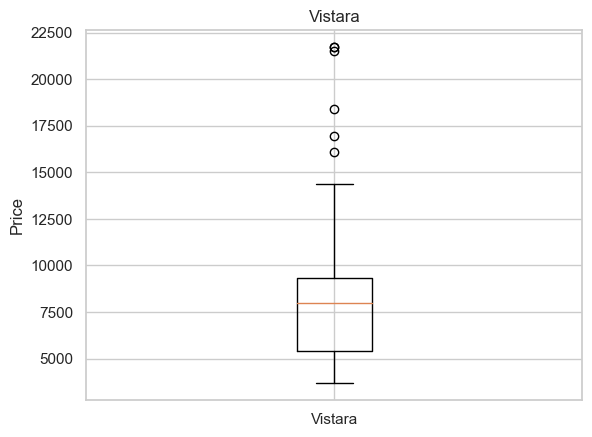

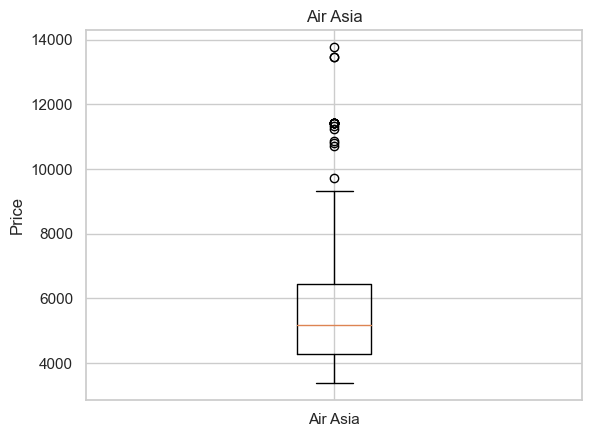

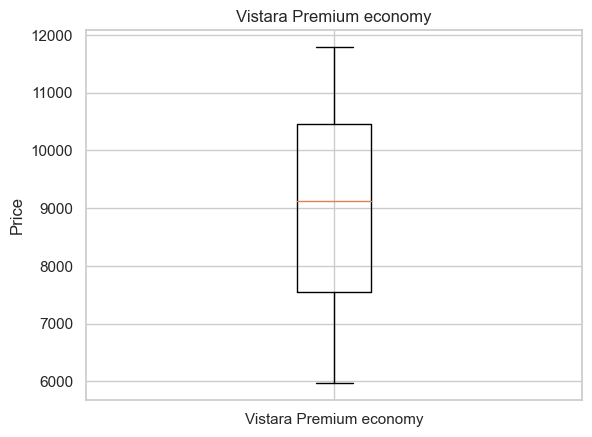

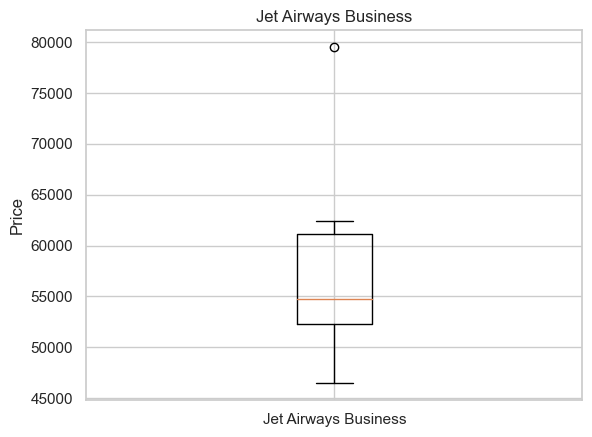

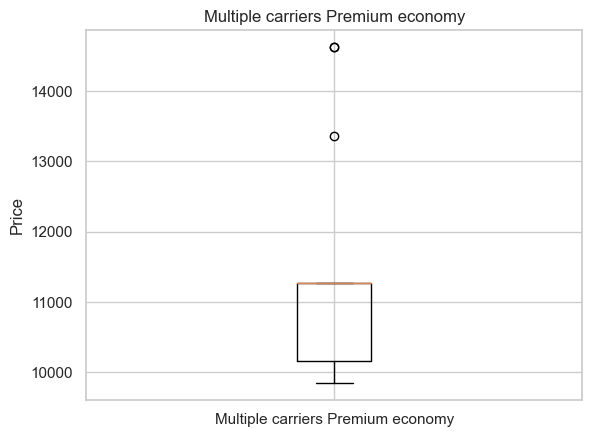

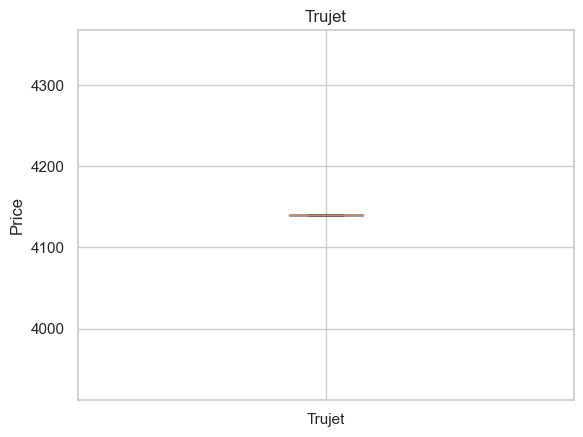

In [55]:
import matplotlib.pyplot as plt

# create a list of unique airlines
airlines = df["Airline"].unique()

# create a boxplot for each airline
for airline in airlines:
    prices = df[df["Airline"] == airline]["Price"]
    plt.boxplot(prices, labels=[airline])
    plt.title(airline)
    plt.ylabel("Price")
    plt.show()


>Based on the boxplots, we can see that the price of flights varies significantly by airline. Some airlines like Jet Airways Business, Multiple carriers Premium economy, and Vistara Premium economy have a higher median price compared to other airlines. On the other hand, airlines like Trujet, Air Asia, and SpiceJet have a lower median price.

>There is also a significant variation in the interquartile range (IQR) for each airline, which indicates a difference in the spread of prices for each airline. For example, the IQR for Jet Airways Business is quite large, indicating a larger variation in prices compared to other airlines.

>Overall, the boxplot provides a good visual summary of how the price of flights varies by airline.

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

<AxesSubplot: >

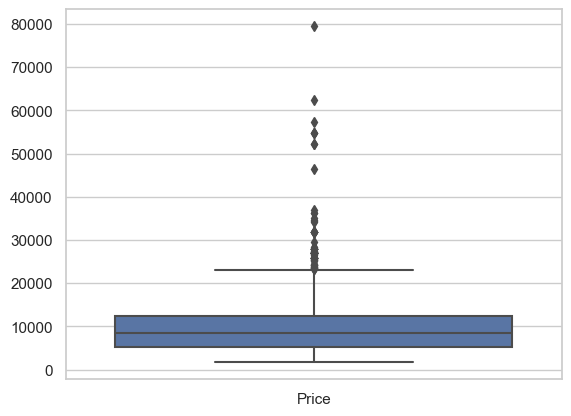

In [56]:
import seaborn as sns

sns.boxplot(data = df)

>Yes, there are potential outliers in the dataset, which can be identified using the boxplot. Outliers are observations that fall outside of the whiskers of the boxplot and can have a significant impact on the analysis.

>In the boxplot of the flight prices, we can see several points outside of the whiskers, which indicate potential outliers. These outliers may impact the analysis by skewing the results and making them less representative of the overall population. For example, if we are calculating the average flight price, these outliers may result in an overestimation or underestimation of the true average price.

>It is important to identify and examine potential outliers to understand their impact on the analysis. One way to deal with outliers is to remove them from the dataset if they are found to be errors or invalid data points. Alternatively, we can use robust statistical methods that are less sensitive to outliers, or we can transform the data to reduce the impact of outliers.

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

>To identify the peak travel season, I would analyze the "Date_of_Journey" feature in the Flight Price dataset. Specifically, I would extract the month and day of the week from the "Date_of_Journey" feature and analyze how the flight prices vary with these variables.

>To present my findings to the boss, I would create visualizations such as line plots or bar graphs to show how the flight prices vary with the month and day of the week. I would also calculate the average flight prices for each month and day of the week to identify the peak season. Additionally, I would analyze the number of flights and the number of passengers traveling during each month and day of the week to provide a comprehensive analysis.

>Based on the findings, I would recommend to the boss to focus on promoting travel during the peak season to maximize profits. I would also suggest offering special discounts during the off-season to attract more customers.

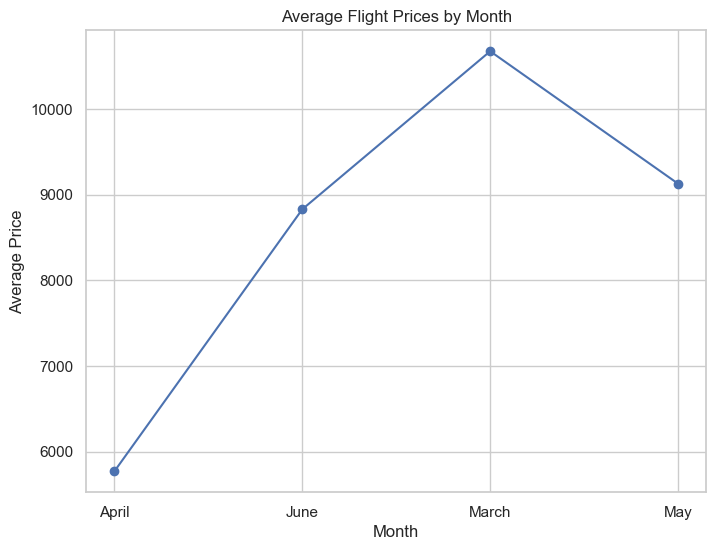

In [57]:
# convert Date_of_Journey column to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# extract month from Date_of_Journey and create a new column
df['Journey_Month'] = df['Date_of_Journey'].dt.month_name()

# group by month and calculate average price
avg_price_by_month = df.groupby('Journey_Month')['Price'].mean().reset_index()

# plot the average prices by month
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(avg_price_by_month['Journey_Month'], avg_price_by_month['Price'], marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price')
ax.set_title('Average Flight Prices by Month')
plt.show()


# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?


>As a data analyst for a flight booking website, to identify any trends in flight prices, I would analyze the following features:

- Date_of_Journey - to identify trends by month, day of the week, and time of the year.
- Airline - to identify differences in pricing between airlines.
- Source and Destination - to identify any geographical trends in pricing.
- Total_Stops - to identify how the number of stops affects the price.

>To present my findings to my team, I would use the following visualizations:

- Line plot - to show the trend in flight prices over time, with date_of_journey on the x-axis and price on the y-axis.
- Box plot - to show the distribution of prices by airline or source and destination, with the airline or source and destination on the x-axis and price on the y-axis.
- Scatter plot - to show the relationship between price and the number of stops, with the number of stops on the x-axis and price on the y-axis.
>These visualizations would help me identify any significant trends in flight prices and provide insights that can be used to optimize pricing strategies and improve sales.

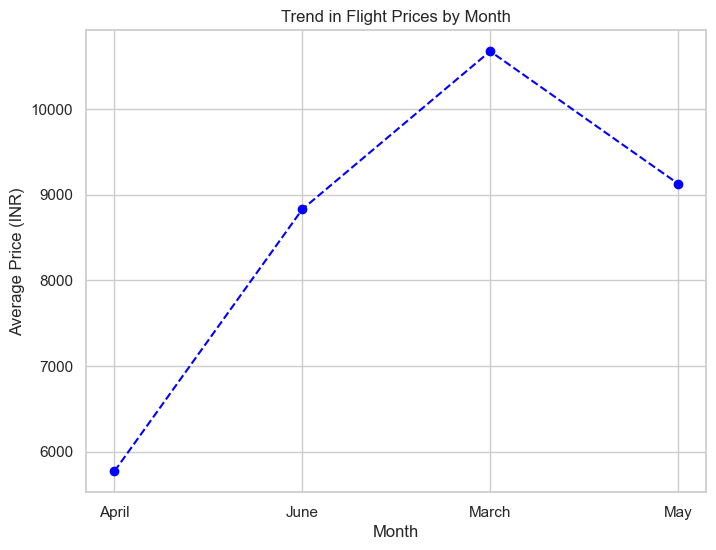

In [58]:
# Convert Date_of_Journey column to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Extract month from Date_of_Journey column
df['Journey_Month'] = df['Date_of_Journey'].dt.month_name()

# Calculate average price by month
month_avg_price = df.groupby('Journey_Month')['Price'].mean()

# Create a line plot to show the trend in flight prices by month
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(month_avg_price.index, month_avg_price.values, marker='o', linestyle='--', color='blue')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price (INR)')
ax.set_title('Trend in Flight Prices by Month')
plt.show()


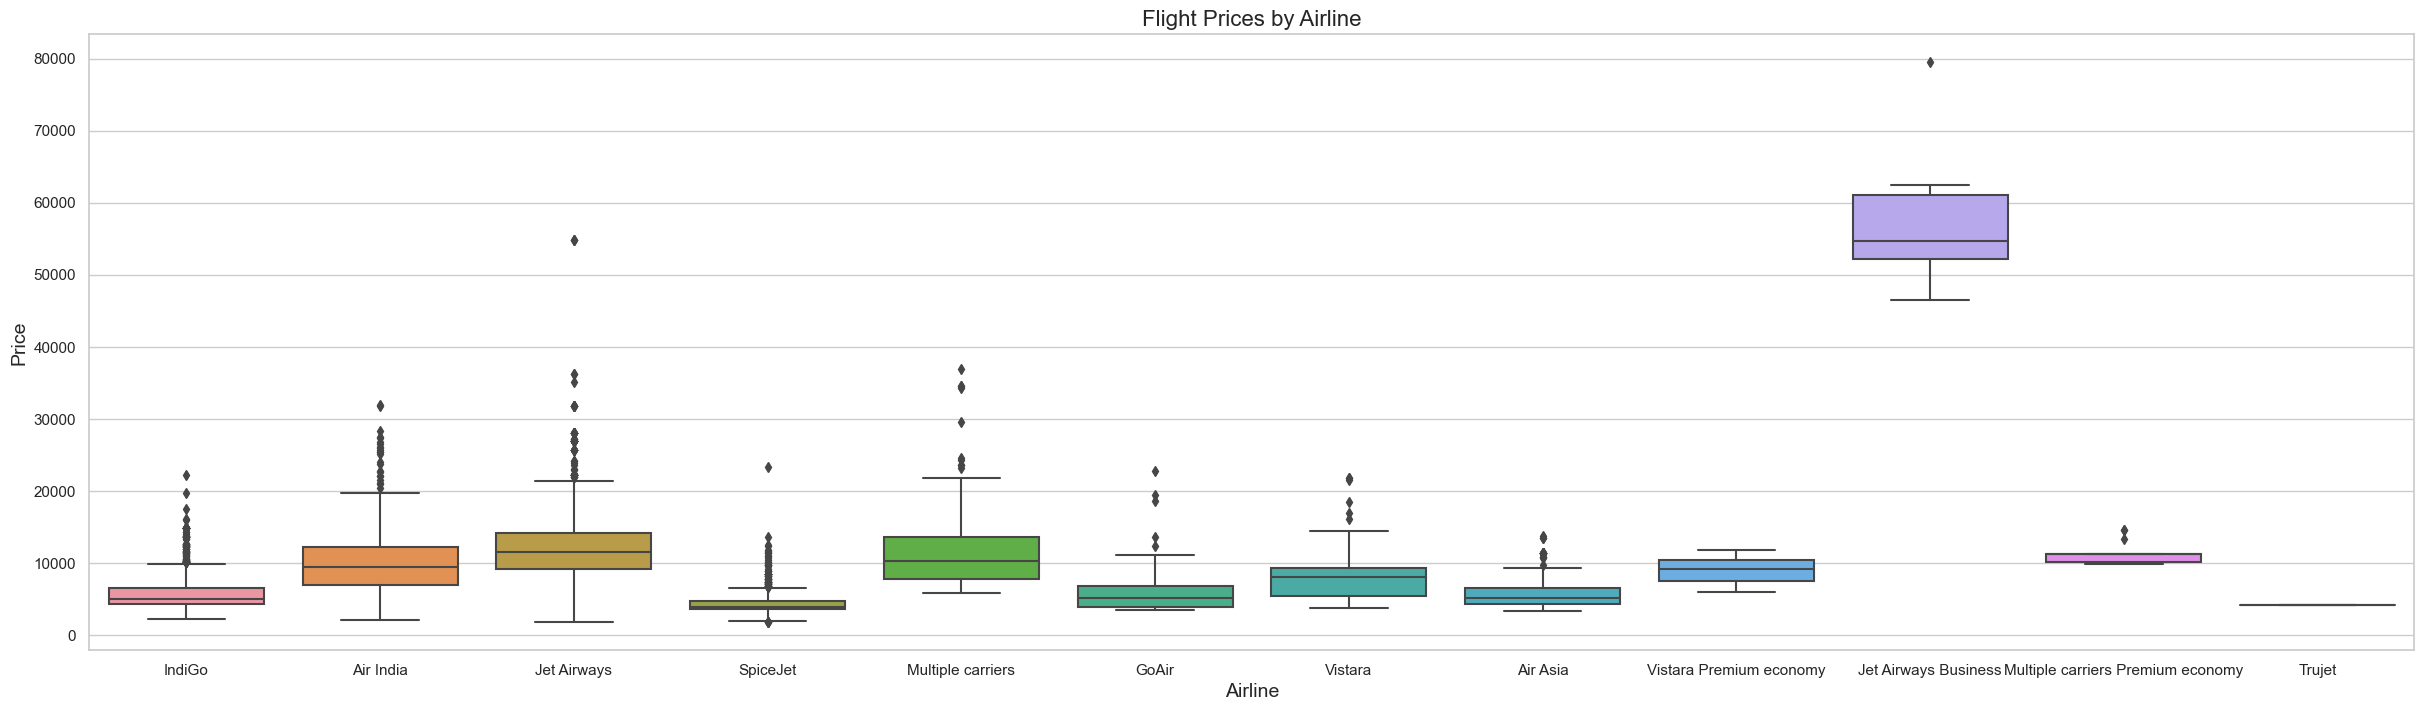

In [59]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(30, 8))

sns.boxplot(x="Airline", y="Price", data=df, ax=ax)

ax.set_xlabel("Airline", fontsize=14)
ax.set_ylabel("Price", fontsize=14)
ax.set_title("Flight Prices by Airline", fontsize=16)

plt.show()


In [60]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [61]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [62]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, np.nan:1, '4 stops':4})

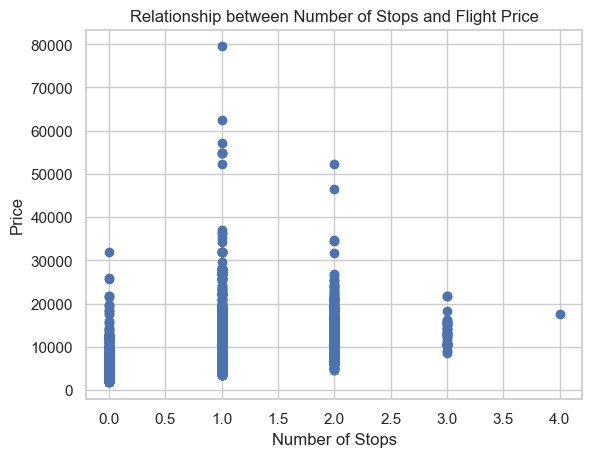

In [63]:
# create a scatter plot
plt.scatter(df['Total_Stops'], df['Price'])

# set labels and title
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.title('Relationship between Number of Stops and Flight Price')

# show the plot
plt.show()


# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

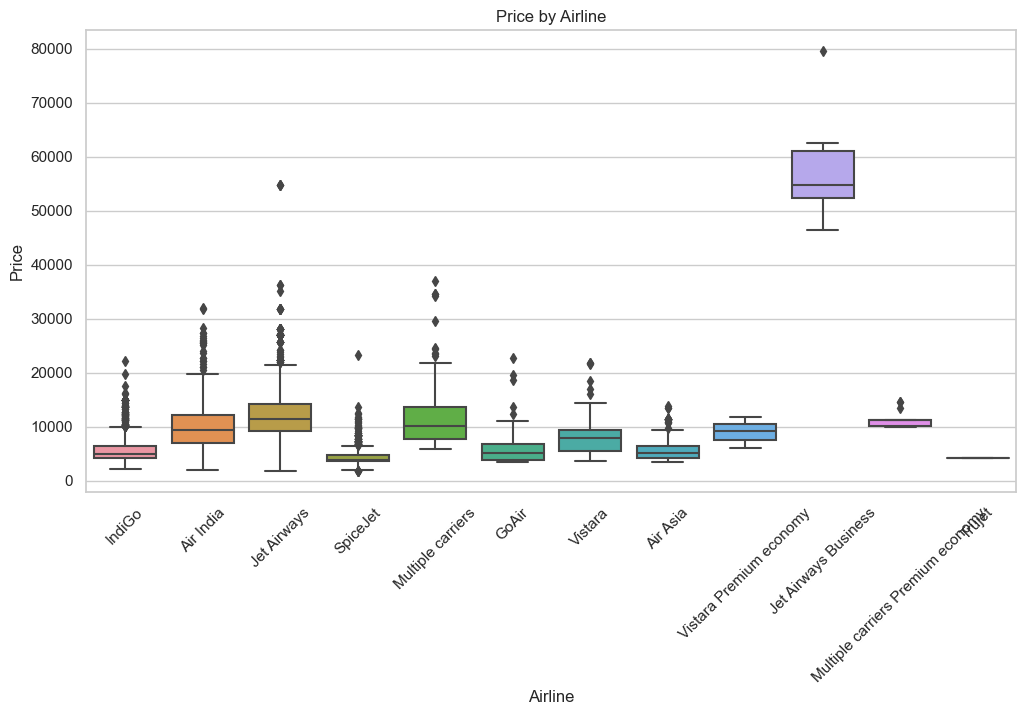

In [64]:
# Analyze the relationship between price and airline
plt.figure(figsize=(12,6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price by Airline')
plt.show()

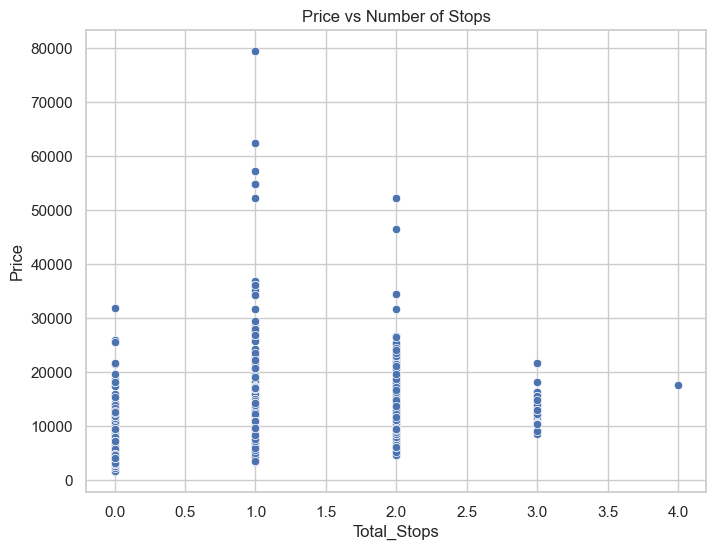

In [65]:
# Analyze the relationship between price and number of stops
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total_Stops', y='Price', data=df)
plt.title('Price vs Number of Stops')
plt.show()

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [67]:
df = pd.read_excel(r"C:\Users\milan\Documents\Data Science\skills\Notes\03-25-23_EDA with Flight Price\dataset\flight_price.xlsx")

In [68]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [71]:
df['Day'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

df['Day'] = df['Day'].astype(int)
df['Month'] =df['Month'].astype(int)
df['Year'] =df['Year'].astype(int)

df.drop('Date_of_Journey',axis=1,inplace=True)

In [72]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_Min'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Min'] = df['Arrival_Min'].astype(int)

df.drop('Arrival_Time', axis=1, inplace = True)

In [73]:
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_Min'] = df['Dep_Time'].str.split(':').str[1]

df['Dep_Hour'] = df['Dep_Hour'].astype(int)
df['Dep_Min'] = df['Dep_Min'].astype(int)

df.drop('Dep_Time', axis=1, inplace = True)

In [74]:
df['Duration_H'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_M'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

# replace '5m' with NaN in 'Duration_H' column
df.loc[df['Duration_H'] == '5m', 'Duration_H'] = 0

# replace NaN with 5 in 'Duration_M' column for the same record
df.loc[df['Duration_H'].isnull(), 'Duration_M'] = 5

# replace NaN values with 0 in 'Duration_H' and 'Duration_M' columns
df['Duration_H'].fillna(0, inplace=True)
df['Duration_M'].fillna(0, inplace=True)

# convert 'Duration_H' and 'Duration_M' columns to integers
df['Duration_H'] = df['Duration_H'].astype(int)
df['Duration_M'] = df['Duration_M'].astype(int)




In [75]:
# convert 'Duration_H' to minutes
df['Duration in Minutes'] = df['Duration_H'] * 60

# add 'Duration_M' to 'Duration in Minutes'
df['Duration in Minutes'] += df['Duration_M']


In [76]:
# drop 'Duration_H' and 'Duration_M' columns
df.drop(['Duration_H', 'Duration_M'], axis=1, inplace=True)

In [77]:
df.drop('Duration', axis=1, inplace=True)

# rename 'Duration in Minutes' to 'Duration'
df.rename(columns={'Duration in Minutes': 'Duration'}, inplace=True)

df.drop('Route', axis=1, inplace=True)

In [78]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,2019,22,25,19,55,150
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,2019,23,20,20,45,155
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,2019,11,20,8,20,180
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,2019,14,10,11,30,160


In [79]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [80]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [81]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, np.nan:1, '4 stops':4})

In [82]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [83]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [84]:
from sklearn.preprocessing import OneHotEncoder
OH = OneHotEncoder()
OH.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [85]:
df_new = pd.DataFrame(OH.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=OH.get_feature_names_out())

In [86]:
df_new

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,2019,22,25,19,55,150
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,2019,23,20,20,45,155
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,2019,11,20,8,20,180
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,2019,14,10,11,30,160


In [88]:
# concatenate the dataframes side by side
concatenated_df = pd.concat([df_new,df], axis=1)

In [89]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline_Air Asia                           10683 non-null  float64
 1   Airline_Air India                          10683 non-null  float64
 2   Airline_GoAir                              10683 non-null  float64
 3   Airline_IndiGo                             10683 non-null  float64
 4   Airline_Jet Airways                        10683 non-null  float64
 5   Airline_Jet Airways Business               10683 non-null  float64
 6   Airline_Multiple carriers                  10683 non-null  float64
 7   Airline_Multiple carriers Premium economy  10683 non-null  float64
 8   Airline_SpiceJet                           10683 non-null  float64
 9   Airline_Trujet                             10683 non-null  float64
 10  Airline_Vistara       

In [90]:
concatenated_df.drop(columns=['Airline','Source','Destination'], axis=1, inplace=True)

In [91]:
concatenated_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [92]:
concatenated_df['Additional_Info'] = concatenated_df['Additional_Info'].str.lower()
unique_additional_info = concatenated_df['Additional_Info'].unique()
print(unique_additional_info)


['no info' 'in-flight meal not included' 'no check-in baggage included'
 '1 short layover' '1 long layover' 'change airports' 'business class'
 'red-eye flight' '2 long layover']


In [93]:
concatenated_df['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [94]:
# group by Additional_Info and calculate mean Price for each group
grouped_df = concatenated_df.groupby('Additional_Info').agg({'Price': 'mean'})

# sort the groups by mean Price and create a dictionary with group names as keys and rank as values
rank_dict = {group: rank+1 for rank, group in enumerate(grouped_df.sort_values('Price').index)}

# map the dictionary to create a new column Additional_Info_Encoded
concatenated_df['Additional_Info_Encoded'] = concatenated_df['Additional_Info'].map(rank_dict)


In [95]:
concatenated_df['Additional_Info_Encoded'].unique()

array([2, 3, 1, 8, 6, 5, 9, 4, 7], dtype=int64)

In [96]:
concatenated_df.drop(columns=['Additional_Info'], axis=1, inplace=True)

In [98]:
# Convert remaining columns to type int
concatenated_df = concatenated_df.astype(int)

In [ ]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Airline_Air Asia                           10683 non-null  int32
 1   Airline_Air India                          10683 non-null  int32
 2   Airline_GoAir                              10683 non-null  int32
 3   Airline_IndiGo                             10683 non-null  int32
 4   Airline_Jet Airways                        10683 non-null  int32
 5   Airline_Jet Airways Business               10683 non-null  int32
 6   Airline_Multiple carriers                  10683 non-null  int32
 7   Airline_Multiple carriers Premium economy  10683 non-null  int32
 8   Airline_SpiceJet                           10683 non-null  int32
 9   Airline_Trujet                             10683 non-null  int32
 10  Airline_Vistara                            106

>As a data scientist working for an airline company, I would analyze various features to identify the factors that affect flight prices. Some of the features that I would consider are:

- Airline: Different airlines have different pricing strategies and may charge different prices based on factors such as the number of amenities provided, route, and popularity.
- Source and destination: Prices may vary depending on the origin and destination of the flight, the distance between the two locations, and the number of flights available on that route.
- Time of year: Prices may fluctuate depending on the season, with peak travel times generally leading to higher prices.
- Number of stops: Flights with more stops may be cheaper than direct flights.
- Additional information: Features such as in-flight meals, baggage allowance, and layovers may impact the price of the flight.

>To present my findings to the management team, I would use various data visualization techniques such as:

- Line charts to show the trend of flight prices over time and to highlight the seasonal price fluctuations.
- Box plots to show the distribution of prices for each airline or source and destination, highlighting any significant outliers and showing the median and quartile values.
- Scatter plots to show the relationship between the price of a flight and other variables such as the number of stops or distance between the source and destination.
- Heat maps to show the distribution of prices based on various features such as the origin and destination of the flight, time of year, and additional features.
>I would also provide statistical analyses and modeling to identify the key factors that impact flight prices and to make predictions about future pricing trends. Overall, my goal would be to provide actionable insights to the management team that can help them make data-driven decisions to optimize pricing strategies and increase profitability.

In [ ]:
# Create pivot table for Airline vs Price
airline_vs_price = pd.pivot_table(df, values='Price', index=['Airline'], aggfunc='mean')

# Print the pivot table
airline_vs_price


,Price
Airline,
Air Asia,5590.260188
Air India,9611.210616
GoAir,5861.056701
IndiGo,5673.682903
Jet Airways,11643.923357
Jet Airways Business,58358.666667
Multiple carriers,10902.678094
Multiple carriers Premium economy,11418.846154
SpiceJet,4338.284841


In [ ]:
Total_Stops_vs_price = pd.pivot_table(df, values='Price', index='Total_Stops', aggfunc='mean')
Total_Stops_vs_price


,Price
Total_Stops,
0,5024.900315
1,10593.570032
2,12715.807895
3,13112.000000
4,17686.000000


In [ ]:
Additional_Info_Encoded_vs_Price= pd.pivot_table(concatenated_df, values='Price', index='Additional_Info_Encoded', aggfunc='mean')
Additional_Info_Encoded_vs_Price

,Price
Additional_Info_Encoded,
1,3645.156250
2,9140.926090
3,9471.834511
4,10873.000000
5,16800.714286
6,22109.631579
7,26480.000000
8,26743.000000
9,56811.250000


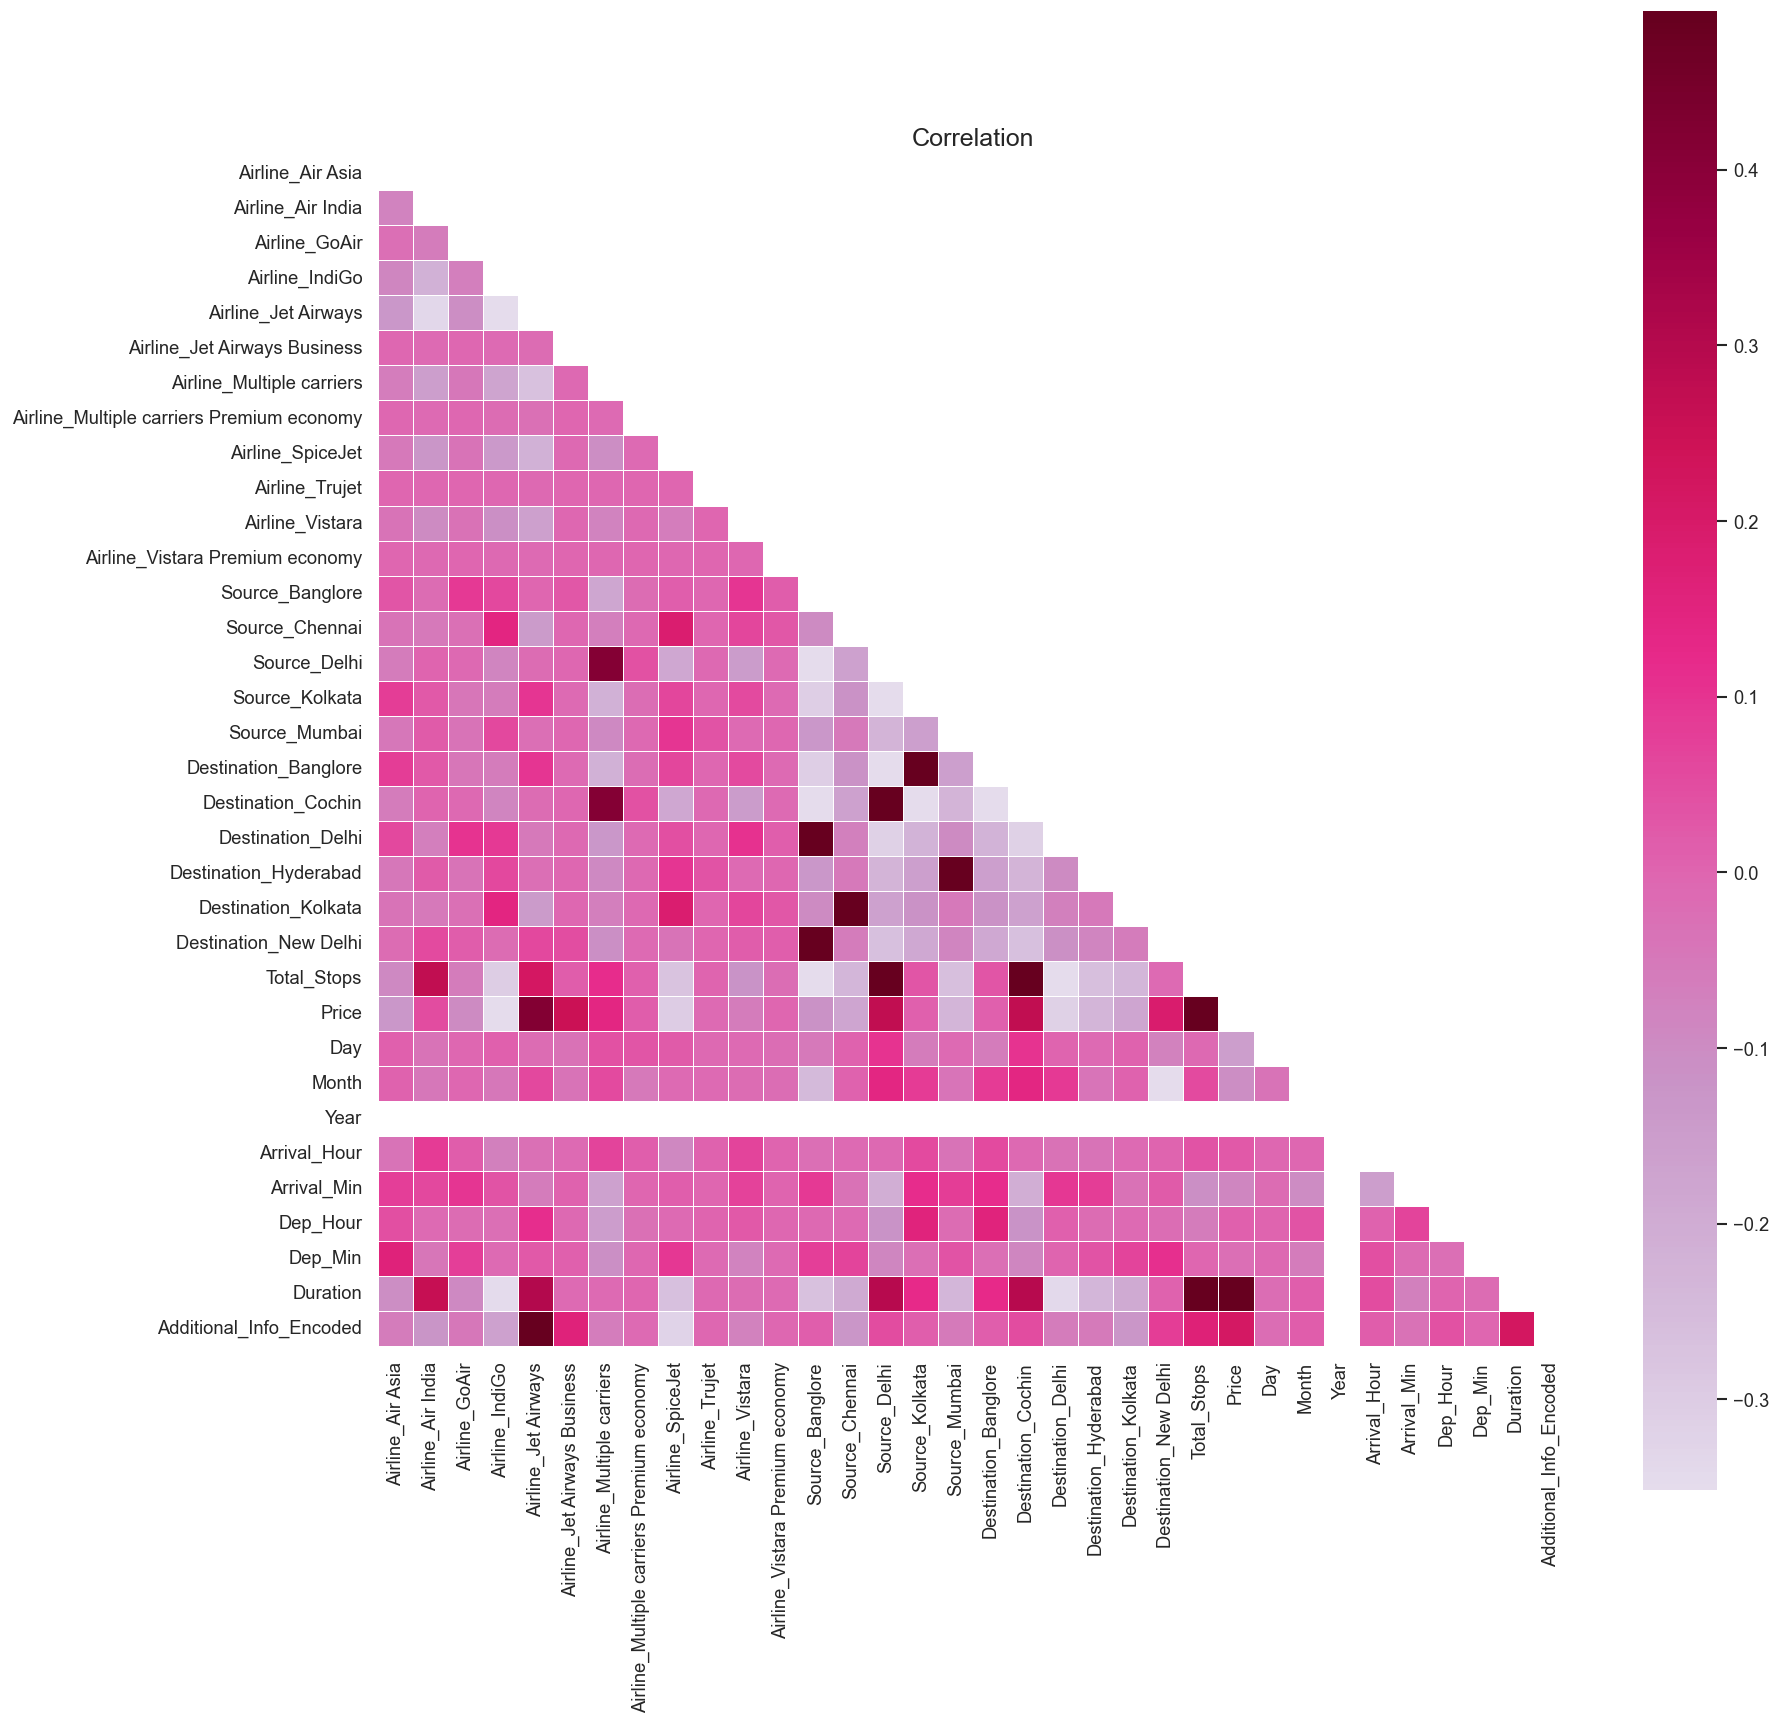

In [ ]:
plt.figure(figsize=(16,16),dpi=120)
corr = concatenated_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=False, mask=mask, cmap='PuRd', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation', fontsize=15)
plt.show()

# Google playstore

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [149]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
# Find out the number of rows and columns
num_rows, num_cols = df.shape

# Print the results
print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")

The DataFrame has 10841 rows and 13 columns.


# Q1O. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

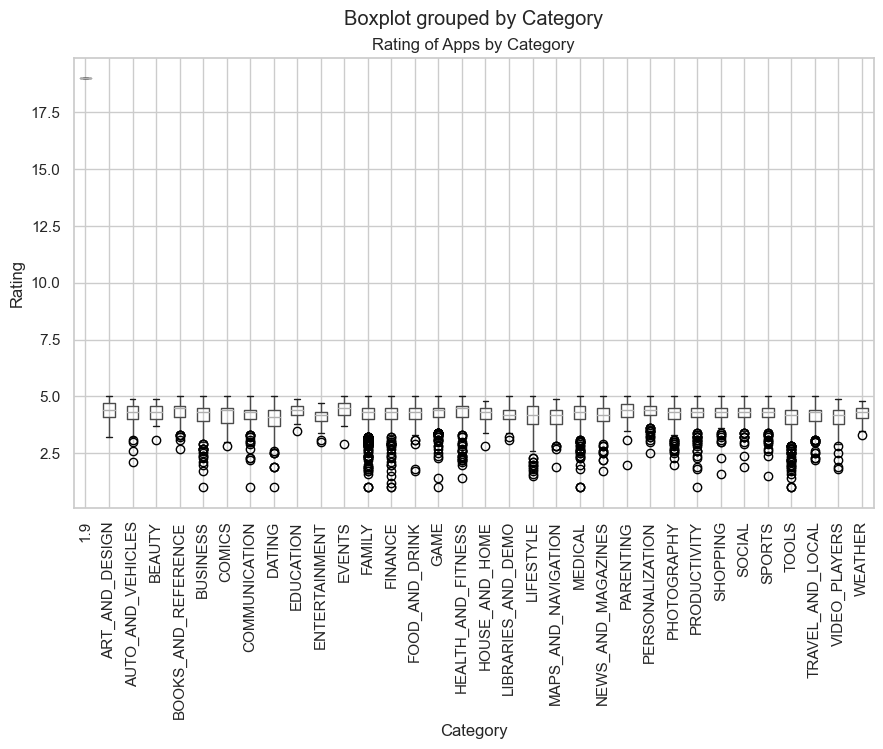

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")

# Remove rows with missing values in the Rating and Category columns
df = df.dropna(subset=['Rating', 'Category'])

# Create a boxplot of the ratings for each app category
df.boxplot(column='Rating', by='Category', figsize=(10,6))
plt.title("Rating of Apps by Category")
plt.ylabel("Rating")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.show()


# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [160]:
# Check for missing values
print(df.isnull().sum())


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


# yes there are null values in the dataframe.

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [161]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [163]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace('Varies with device',np.nan)
df['Size']=df['Size'].replace('1,000+',1000)
df['Size']=df['Size'].astype(float)

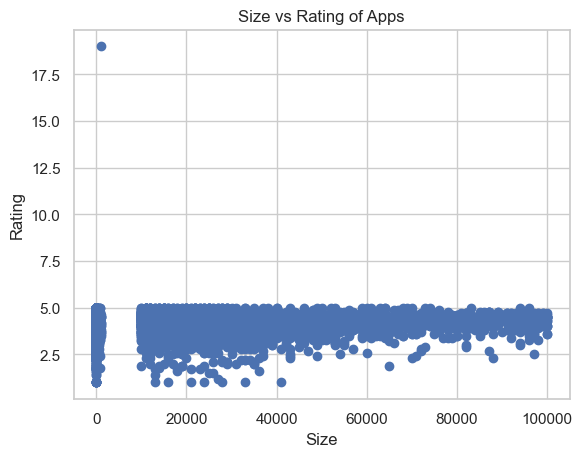

In [164]:
import pandas as pd
import matplotlib.pyplot as plt




# Create a scatter plot of 'Rating' vs 'Size'
plt.scatter(df['Size'], df['Rating'])
plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('Size vs Rating of Apps')
plt.show()


# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [165]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [169]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', 'Everyone', '$1.20'], dtype=object)

In [175]:
chars_to_remove=['+',',','$','Everyone']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df[cols]=df[cols].str.replace(item,'')

In [180]:
df['Price']=df['Price'].str.replace('','0')

In [181]:
df['Price'] = df['Price'].astype(float)

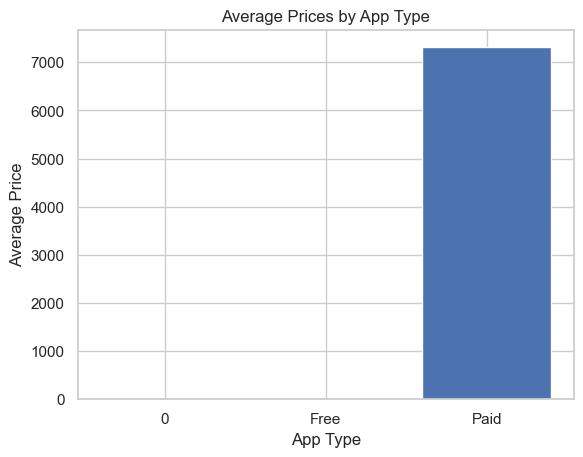

In [183]:
# Group the data by 'Type' and calculate the average price for each group
avg_prices = df.groupby('Type')['Price'].mean()

# Create a bar chart of average prices by app type
plt.bar(avg_prices.index, avg_prices.values)
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.title('Average Prices by App Type')
plt.show()

# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [184]:
# Create a frequency table of the top 10 most popular apps based on the number of installs
freq_table = df[['App', 'Installs']].sort_values('Installs', ascending=False).head(10)

# Print the frequency table
print(freq_table)

                                               App   Installs
10472      Life Made WI-Fi Touchscreen Photo Frame       Free
467                                Viber Messenger  500000000
4115                                       Twitter  500000000
3476                               Google Calendar  500000000
3326                  Gboard - the Google Keyboard  500000000
3533                               Google Calendar  500000000
431                                Viber Messenger  500000000
420    UC Browser - Fast Download Private & Secure  500000000
3562                               Google Calendar  500000000
3473                                       Dropbox  500000000


# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [193]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [200]:
# Drop the row at index 10472 (if it exists)
if len(df) > 10472:
    df = df.drop(df.index[10472])

In [201]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [202]:
df = df[df['Reviews'].str.isnumeric()]

In [204]:
df['Reviews']=df['Reviews'].astype(int)

C:\Users\milan\AppData\Local\Temp\ipykernel_7244\1268047491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews']=df['Reviews'].astype(int)


# Popularity: Analyze the number of installs or ratings of apps in each category to determine which categories are most popular and have the potential for higher revenue.

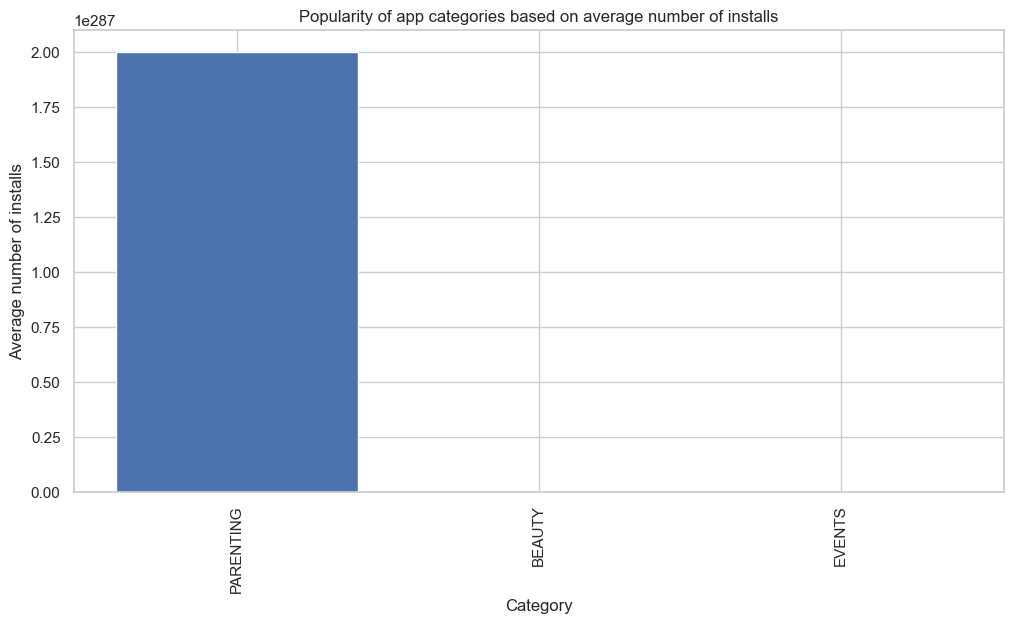

In [206]:
# Calculate the average number of installs for each app category
avg_installs_by_category = df.groupby("Category")["Installs"].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(avg_installs_by_category.index, avg_installs_by_category.values)
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Average number of installs")
plt.title("Popularity of app categories based on average number of installs")
plt.show()

# Competition: Analyze the number of apps in each category to understand the competition and the saturation of the market. This information can help the company decide whether to enter a highly competitive category or choose a less crowded category.

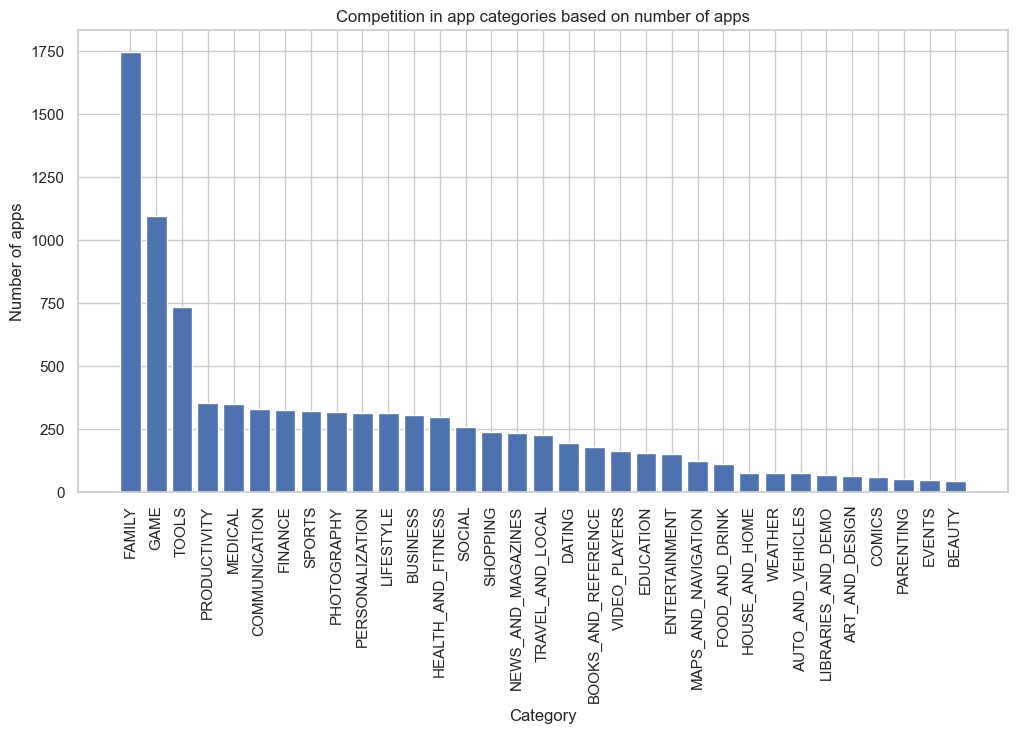

In [207]:
# Count the number of apps in each category
num_apps_by_category = df["Category"].value_counts()

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(num_apps_by_category.index, num_apps_by_category.values)
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of apps")
plt.title("Competition in app categories based on number of apps")
plt.show()

# Ratings and reviews: Analyze the ratings and reviews of apps in each category to understand user preferences and identify areas for improvement. This information can help the company create a better app that meets users' needs and preferences.

C:\Users\milan\AppData\Local\Temp\ipykernel_7244\4226533975.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratings_by_category.index, rotation=90)


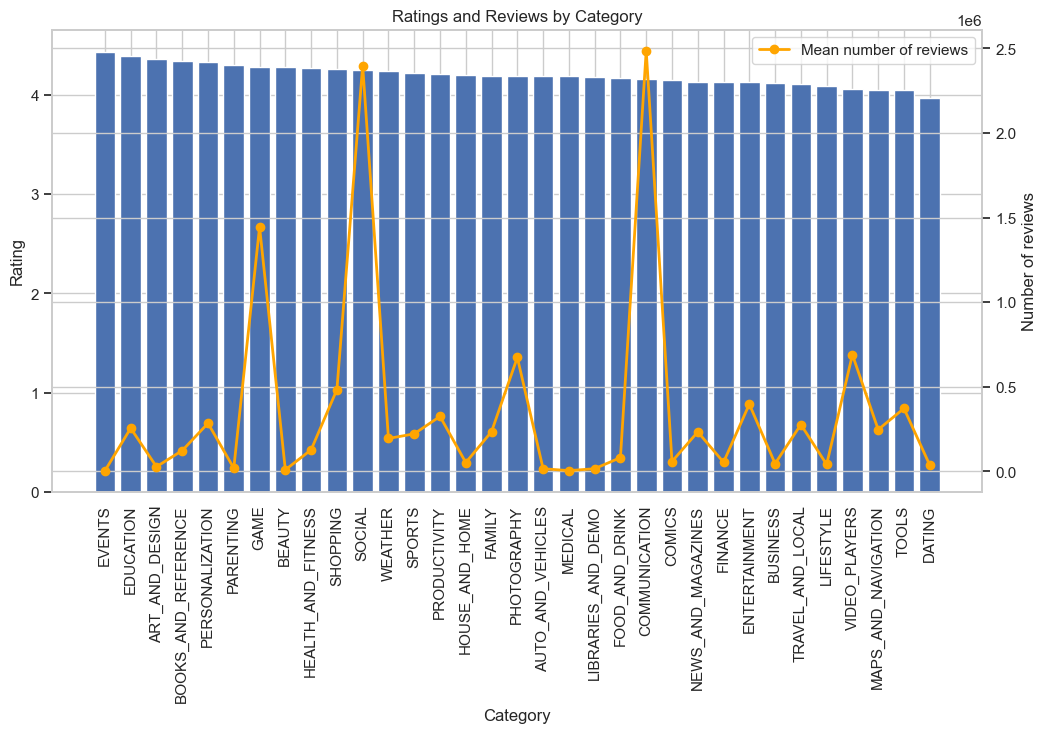

In [208]:
# Group the data by category and calculate the mean rating and mean number of reviews
ratings_by_category = df.groupby("Category").agg({"Rating": "mean", "Reviews": "mean"}).sort_values("Rating", ascending=False)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(ratings_by_category.index, ratings_by_category["Rating"], label="Mean rating")
ax.set_xlabel("Category")
ax.set_ylabel("Rating")
ax2 = ax.twinx()
ax2.plot(ratings_by_category.index, ratings_by_category["Reviews"], color="orange", marker="o", linewidth=2, label="Mean number of reviews")
ax2.set_ylabel("Number of reviews")
ax.set_xticklabels(ratings_by_category.index, rotation=90)
ax.set_title("Ratings and Reviews by Category")
plt.legend()
plt.show()

# Pricing: Analyze the pricing of apps in each category to understand the pricing trends and determine the optimal pricing strategy for the new app. This information can help the company decide whether to price the app competitively or set a premium price.

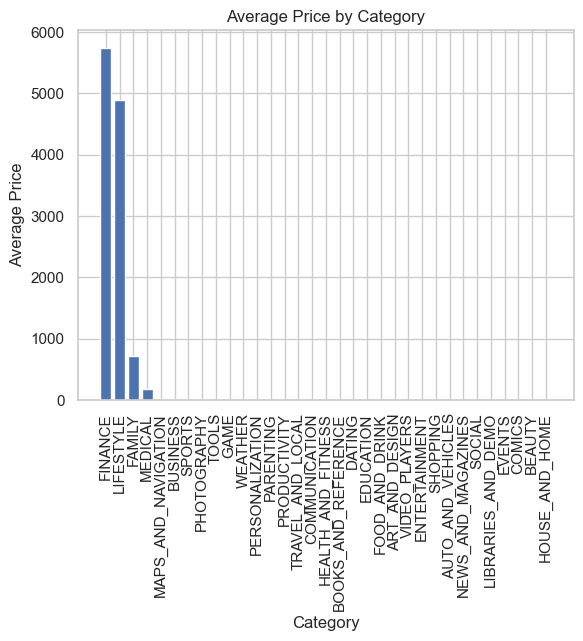

In [209]:
# Group the data by category and calculate the average price
avg_price_by_category = df.groupby('Category')['Price'].mean().sort_values(ascending=False)

# Create a bar chart to visualize the average price by category
plt.bar(avg_price_by_category.index, avg_price_by_category.values)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Price by Category')
plt.show()

# By looking in to these graphs it looks like Parenting apps are more popular in playstore.

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

# A bar chart to visualize the number of apps developed by each catagory.

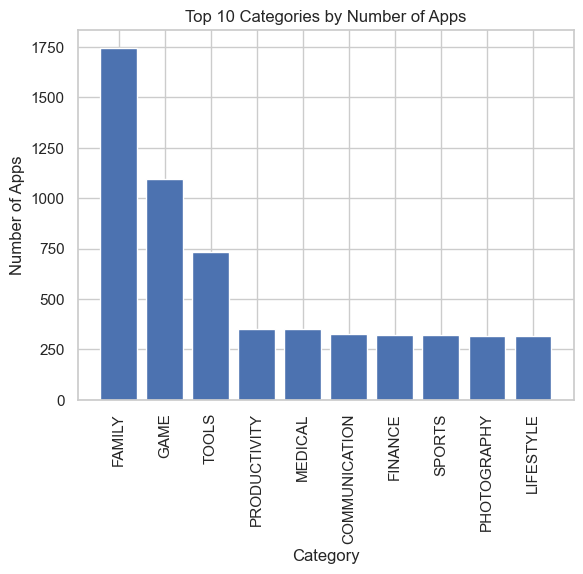

In [212]:
import matplotlib.pyplot as plt

# Group the dataframe by the 'Category' column and count the number of apps in each category
category_counts = df.groupby('Category')['App'].count()

# Sort the categories by the number of apps in descending order and take the top 10
top_categories = category_counts.sort_values(ascending=False)[:10]

# Plot the bar chart
plt.bar(top_categories.index, top_categories.values)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Top 10 Categories by Number of Apps')
plt.show()


# A scatter plot to visualize the relationship between the average rating of apps and the number of installs for category. 

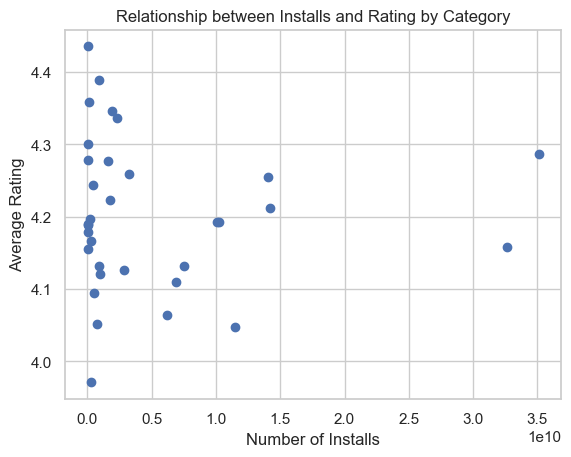

In [213]:
# Calculate the average rating and number of installs for each category
df_avg = df.groupby('Category').agg({'Rating': 'mean', 'Installs': lambda x: np.sum(pd.to_numeric(x))})

# Create a scatter plot
plt.scatter(df_avg['Installs'], df_avg['Rating'])

# Add labels and title
plt.xlabel('Number of Installs')
plt.ylabel('Average Rating')
plt.title('Relationship between Installs and Rating by Category')

plt.show()

# A box plot to visualize the distribution of app prices for each category.

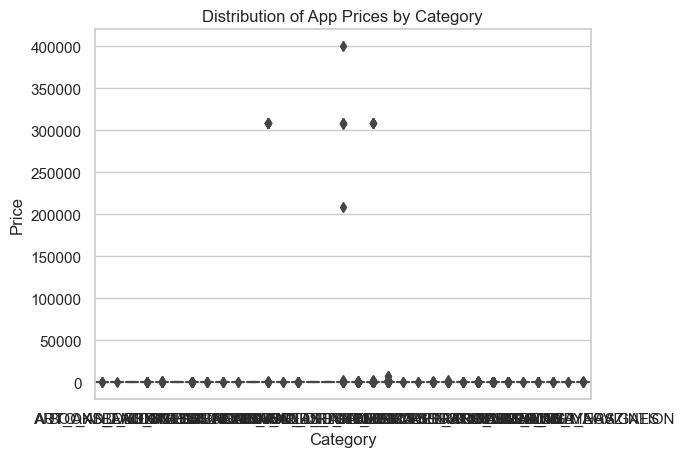

In [215]:
import seaborn as sns

# create a box plot of app prices for each category
sns.boxplot(x="Category", y="Price", data=df)

# set the x-axis label
plt.xlabel("Category")

# set the y-axis label
plt.ylabel("Price")

# set the plot title
plt.title("Distribution of App Prices by Category")

# show the plot
plt.show()


In [219]:
# Family app has most sucessful.

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

#### Seasonal trends: We can also analyze the seasonal trends to identify if there are any particular seasons or events (e.g., holidays, festivals, etc.) that have higher app downloads and ratings.

C:\Users\milan\AppData\Local\Temp\ipykernel_7244\3050595021.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Last Updated'].dt.month.apply(get_season)


   Season                                           Installs    Rating
0    Fall  1000000100000010000500000100001000005000010000...  4.057368
1  Spring  5000050000100000001000001000001000010000050000...  4.145594
2  Summer  5000000500000001000001000000100001000000100000...  4.248442
3  Winter  1000050000010000010000100000500000500000500000...  4.105223


ValueError: Image size of 302537x457 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

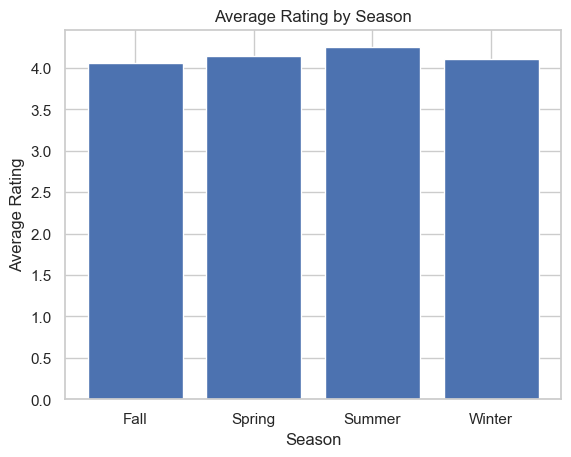

In [229]:
# Create a new column for season based on month
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['Season'] = df['Last Updated'].dt.month.apply(get_season)

# Group the data by season and calculate the total number of installs and average rating for each season
df_seasonal = df.groupby('Season').agg({'Installs': 'sum', 'Rating': 'mean'}).reset_index()

# Print the resulting dataframe
print(df_seasonal)

# Create a bar chart to visualize the seasonal trends
import matplotlib.pyplot as plt

plt.bar(df_seasonal['Season'], df_seasonal['Installs'])
plt.title('Total Number of Installs by Season')
plt.xlabel('Season')
plt.ylabel('Total Number of Installs')
plt.show()

plt.bar(df_seasonal['Season'], df_seasonal['Rating'])
plt.title('Average Rating by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.show()


In [233]:
# it looks like Summer is the best time to lunch a new app.